In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lightkurve as lk
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/HarritonResearchLab/sunnyhills/main/learning/kepler_experiment/data/concise_df.csv')

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

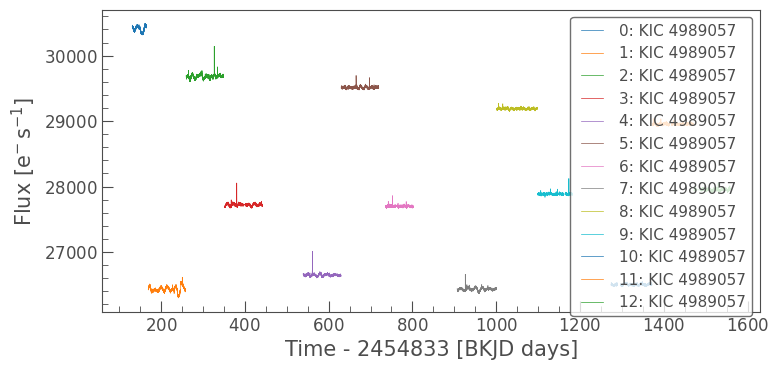

In [3]:
search_result = lk.search_lightcurve('Kepler-1017', author='Kepler', cadence='long')
# Download all available Kepler light curves
lc_collection = search_result.download_all()
lc_collection.plot()

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

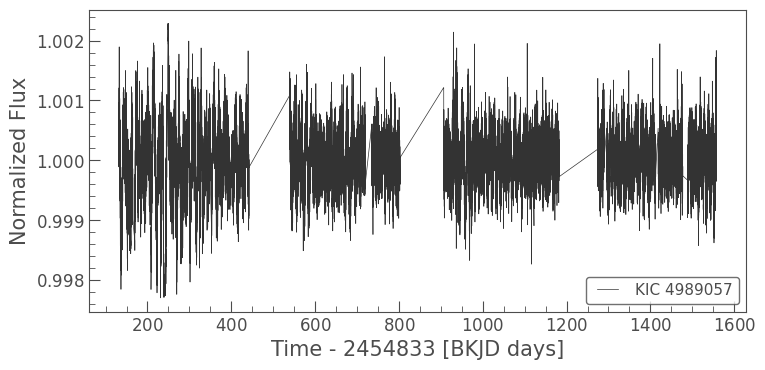

In [4]:
# Flatten the light curve
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot()

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

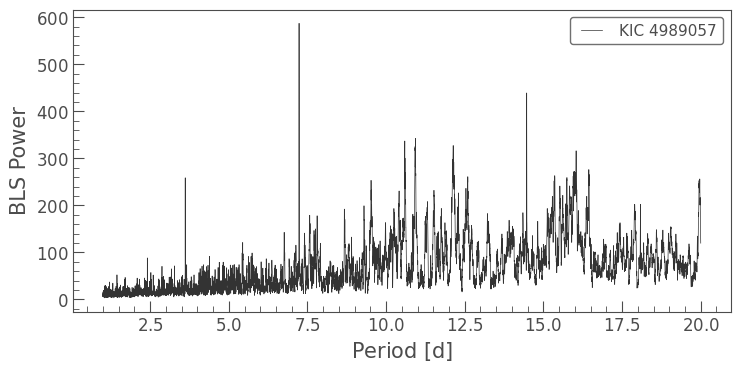

In [5]:
# Create array of periods to search
period = np.linspace(1, 20, 10000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot()

In [9]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

fake_period = 5.6

ax = lc.fold(period=3, epoch_time=planet_b_t0).scatter()

#planet_b_model = bls.get_transit_model(period=planet_b_period,
                                       #transit_time=planet_b_t0,
                                       #duration=planet_b_dur)

#planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)

#ax.set_xlim(-0.75, 0.75)

MemoryError: Unable to allocate 389. KiB for an array with shape (49798,) and data type float64